In [1]:
import os
import json
import glob 
from xml.etree import ElementTree as ET
from collections import namedtuple


from typing import NamedTuple, List, Any, Tuple
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

In [2]:
LABEL_MAP = {
    "aeroplane": 0,
    "bicycle": 1,
    "bird": 2,
    "boat": 3,
    "bottle": 4,
    "bus": 5,
    "car": 6,
    "cat": 7,
    "chair": 8,
    "cow": 9,
    "diningtable": 10,
    "dog": 11,
    "horse": 12,
    "motorbike": 13,
    "person": 14,
    "pottedplant": 15,
    "sheep": 16,
    "sofa": 17,
    "train": 18,
    "tvmonitor": 19
    }

def parse_xml(xml_dir: List[str]) -> List[NamedTuple]:
    """Parse a xml file and collects all necessary information."""
    tree = ET.parse(xml_dir)
    root = tree.getroot() 
    Object = namedtuple("Object", "label xmin xmax ymin ymax difficult")
    
    objs = []
    for obj in root.iter("object"):
        name = obj.find("name").text
        label = LABEL_MAP[name]
        bndbox = obj.find("bndbox")
        # The bounding box starts with 0.
        xmin = int(bndbox.find("xmin").text) - 1
        xmax = int(bndbox.find("xmax").text) - 1
        ymin = int(bndbox.find("ymin").text) - 1
        ymax = int(bndbox.find("ymax").text) - 1
        difficult = int(obj.find("difficult").text)
        objs.append(Object(label, xmin, xmax, ymin, ymax, difficult))
    return objs

annotation_dir = "~/datasets/voc/VOCdevkit/VOC2007/Annotations/"
annotation_dir = os.path.expanduser(annotation_dir)
xml_dirs = glob.glob(os.path.join(annotation_dir, "*.xml"))
annotations = [parse_xml(x) for x in xml_dirs]

In [3]:
def get_train_test_annotations(root: str) -> Tuple[List[str]]:
    """Expect:
    root___VOCdevkit___VOC2007
                   |___VOC2012
    """
    root = os.path.expanduser(root)
    voc07 = os.path.join(root, "VOCdevkit", "VOC2007")
    voc12 = os.path.join(root, "VOCdevkit", "VOC2012")
    train_imgs, test_imgs, train_labels, test_labels = [], [], [], []

    for voc in [voc07, voc12]:
        base_txt = os.path.join(voc, "ImageSets", "Main")
        base_annot = os.path.join(voc, "Annotations")
        base_img = os.path.join(voc, "JPEGImages")

        trainval = os.path.join(base_txt, "trainval.txt")
        trainval_names = np.loadtxt(trainval, str)
        train_label = [
            parse_xml(os.path.join(base_annot, i + ".xml")) for i in trainval_names]
        train_img = [
            os.path.join(base_img, i + ".jpg") for i in trainval_names]
    
        if voc.find("VOC2007") > -1:
            # VOC2012 does not contain test.txt.
            # Find test.txt only for VOC2007.
            test = os.path.join(base_txt, "test.txt")
            test_names = np.loadtxt(test, str)
            test_label = [
                parse_xml(os.path.join(base_annot, i + ".xml")) for i in test_names]
            test_img = [
                os.path.join(base_img, i + ".jpg") for i in test_names]
            test_imgs += test_img
            test_labels += test_label

        train_imgs += train_img
        train_labels += train_label
    assert len(train_imgs) == len(train_labels)
    assert len(test_imgs) == len(test_labels)
    return train_imgs, train_labels, test_imgs, test_labels

train_imgs, train_labels, test_imgs, test_labels = get_train_test_annotations(
    "~/datasets/voc/")

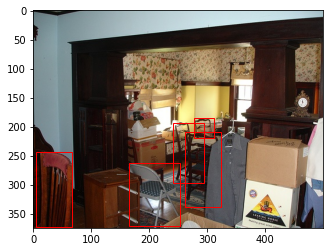

In [11]:
from ninpy.datasets.utils import cv2_loader
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def xyminmax2xyhw(xy_min_max: NamedTuple) -> NamedTuple:
    """Convert xy-min xy-max format to xyhw namedtuple."""
    Object = namedtuple("Object", "x y h w")
    h = xy_min_max.xmax - xy_min_max.xmin
    w = xy_min_max.ymax - xy_min_max.ymin
    return Object(xy_min_max.xmin, xy_min_max.ymin, h, w)


img, label = train_imgs[0], train_labels[0]
img = cv2_loader(img)
plt.imshow(img)
for l in label:
    l = xyminmax2xyhw(l)
    x, y, h, w = l.x, l.y, l.h, l.w
    rect = Rectangle((x, y), h, w, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
plt.show()

In [ ]:
class PascalObject(BurstDataset):
    def __init__(
        self,
        root: str,
        loader: Callable,
        target_loader: Optional[Callable] = None,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None
        ) -> None:
        mode = model.lower()
        assert mode in ["train", "test", "valid"]
        self.mode = mode
        super().__init__(root, loader, target_loader, transform, target_transform)

    def get_data_dirs_labels(self):
        """Return data_dirs and labels."""
    
        self.root
        self.mode



        return

    def target_loader(self, target: NamedTuple) -> :
        """Return processed labels."""

        return
    
    def collate_fn(self, batch:) -> :
        """Collate data into batch for DataLoader."""

        return


In [ ]:
def prepare_labels():
    return